# Plotting of covariances

## Initializations

In [16]:
#%matplotlib widget



Use `%matplotlib qt` if you want seperate windows for plots

`%matplotlib notebook` might work if using the jupyter notebook in a browser, but doesn't work in vscode

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, widgets
import matplotlib.colorbar as mcb
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot, finalizePlot

In [18]:
initPlot()

## Load Data

Here I am loading data for the MS, but the filepaths need to be adapted to wherever your files are

In [19]:
# Adapt this to the file directories you have

dir_ms="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"
dir_takahashi="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/"
#dir_slics="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/"
dir_slics="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_singleZ_aifa/"


datatype="slics"#"slics"#"slics" 

if datatype=="ms":
    cov_fft=np.loadtxt(dir_ms+"cov_MS_fft_sigma_0.00_n_1048576.00_thetaMax_1.87.dat")
    cov_T1inf=np.loadtxt(dir_ms+"cov_infinite_term1Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T2=np.loadtxt(dir_ms+"cov_square_term2Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T4=np.loadtxt(dir_ms+"cov_infinite_term4Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T5=np.loadtxt(dir_ms+"cov_infinite_term5Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T6=np.loadtxt(dir_ms+"cov_square_term6Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T7=np.loadtxt(dir_ms+"cov_infinite_term7Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    map3=np.loadtxt(dir_ms+"map_cubed")

    
elif datatype=="takahashi":
    cov_fft=np.load(dir_takahashi+"Map_cov_euclid.npy")
    cov_T1inf=np.loadtxt(dir_takahashi+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")*3
    cov_T2=np.loadtxt(dir_takahashi+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
    cov_T4=np.loadtxt(dir_takahashi+"cov_infinite_term4Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
    cov_T5=np.loadtxt(dir_takahashi+"cov_infinite_term5Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
    cov_T6=np.loadtxt(dir_takahashi+"cov_square_term6Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
    cov_T7=np.loadtxt(dir_takahashi+"cov_infinite_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
    map3=np.loadtxt(dir_takahashi+"map_cubed")



elif datatype=="slics":
#     cov_T1inf=np.loadtxt(dir_slics+"cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#     cov_T2=np.loadtxt(dir_slics+"cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#    cov_T4=np.loadtxt(dir_slics+"cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#     cov_T5=np.loadtxt(dir_slics+"cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#    cov_T6=np.loadtxt(dir_slics+"cov_square_term6Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
#     cov_T7=np.loadtxt(dir_slics+"cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")


    cov_T1inf=np.loadtxt(dir_slics+"cov_infinite_term1Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T2=np.loadtxt(dir_slics+"cov_square_term2Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")
#    cov_T4=np.loadtxt(dir_slics+"cov_infinite_term4Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T4=np.zeros_like(cov_T1inf)
    cov_T5=np.loadtxt(dir_slics+"cov_infinite_term5Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")
#    cov_T6=np.loadtxt(dir_slics+"cov_square_term6Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T6=np.zeros_like(cov_T1inf)

    cov_T7=np.loadtxt(dir_slics+"cov_infinite_term7Numerical_sigma_0.00_n_107987.71_thetaMax_7.87_gpu.dat")


    #map3=np.load(dir_slics+"map_cubed.npy")

    #cov_fft=np.cov(map3)



## Plot Covariance as heatmap

In the next cell I am setting a list with the independent theta combinations for aperture radii between 2' and 16'. This is useful for the axis-labelling in the plot.

In [20]:
# Set Thetas labels
thetas_ind = np.array([[4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4,16,16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

NameError: name 'im' is not defined

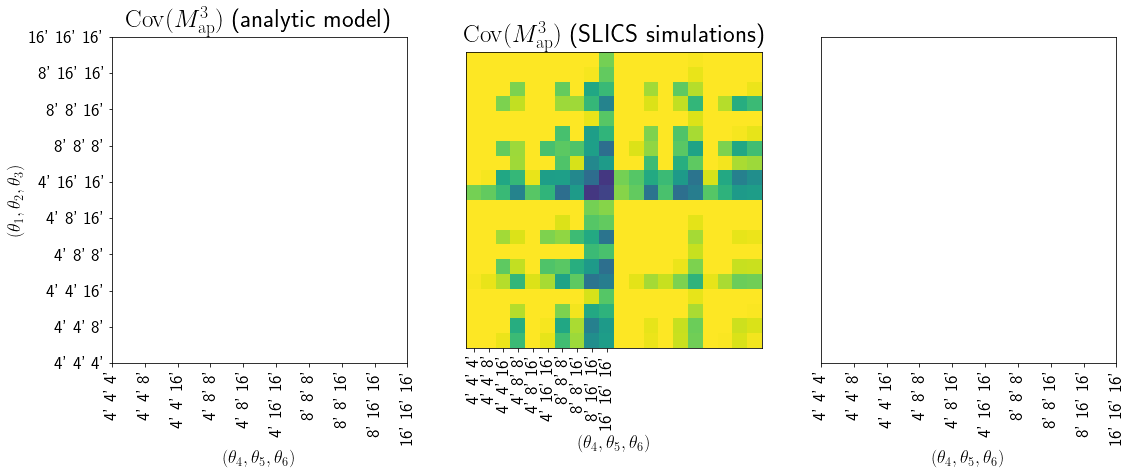

In [22]:
fig, ax=plt.subplots(ncols=3, figsize=(18,6))
cov_tot=(cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7)

ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])



ax[0].set_title(r"$\mathrm{Cov}(M_\mathrm{ap}^3)$ (analytic model)", size=25)
#im=ax[0].imshow(cov_fft, norm=LogNorm(vmin=5e-19, vmax=1e-16))
#fig.colorbar(im, ax=ax[0],fraction=0.046, pad=0.04)

ax[1].set_title(r"$\mathrm{Cov}(M_\mathrm{ap}^3)$ (SLICS simulations)", size=25)
ax[1].imshow(cov_tot, norm=LogNorm(vmin=5e-19, vmax=1e-16))
fig.colorbar(im, ax=ax[1],fraction=0.046, pad=0.04)

ax[2].set_title(r"$2\frac{\mathrm{Cov}_\mathrm{ana}-\mathrm{Cov}_\mathrm{sim}}{\mathrm{Cov}_\mathrm{ana}+\mathrm{Cov}_\mathrm{sim}}$", size=30)
cmap=cm.get_cmap('RdBu', 16)
#im2=ax[2].imshow(2*(cov_tot-cov_fft_d)/(cov_tot+cov_fft_d), vmin=-0.2, vmax=0.2, cmap=cmap)
#fig.colorbar(im2, ax=ax[2],fraction=0.046, pad=0.04)

finalizePlot(ax, outputFn=dir_slics+"/ComparisonCov_analytical_simulation.png", showlegend=False)


# Plot diagonal with individual terms

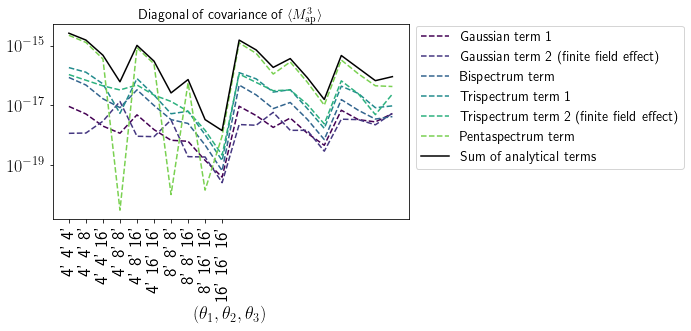

In [23]:
fig, ax=plt.subplots(figsize=(10,5))

colors=cm.viridis(np.linspace(0, 0.8, 6))

ax.set_title(r"Diagonal of covariance of $\langle M_\mathrm{ap}^3\rangle$")
ax.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)
ax.set_yscale('log')
#ax.plot(np.diag(cov_fft), label="From simulation", color='red')
ax.plot(np.diag(cov_T1inf), label='Gaussian term 1', ls='--', color=colors[0])
ax.plot(np.diag(cov_T2), label='Gaussian term 2 (finite field effect)', ls='--', color=colors[1])
ax.plot(np.diag(cov_T4), label=f'Bispectrum term', ls='--', color=colors[2])
ax.plot(np.diag(cov_T5), label='Trispectrum term 1', ls='--', color=colors[3])
ax.plot(np.diag(cov_T6), label='Trispectrum term 2 (finite field effect)', ls='--', color=colors[4])
ax.plot(np.diag(cov_T7), label='Pentaspectrum term', ls='--', color=colors[5])
ax.plot(np.diag(cov_tot), label='Sum of analytical terms', color='k')

ax.legend(bbox_to_anchor=(1, 1.03))

finalizePlot(ax, outputFn=dir_slics+"/ComparisonCov_analytical_simulation_individualTerms.png", showlegend=False)
